### Установка TensоrFlow и Keras 

In [162]:
# !pip install tensorflow==2.1.0 Keras==2.3.1

### Импорт необходимых инструментов

In [163]:
import tensorflow as tf # Машинное обучение
import keras # API для TensorFlow
import numpy as np # Научные вычисления
import matplotlib.pyplot as plt # Визуализация 2D и 3D графики
import pandas as pd # Обработка и анализ данных

### Загрузка модели

In [164]:
mnist = tf.keras.datasets.fashion_mnist # Загрузка набора данных Fashion-MNIST

### Загрузка набора данных и разбиение на обучающие и тестовые выборки

In [165]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

### Отображение изображения из обучающей выборки

[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 154 155 170 165 14

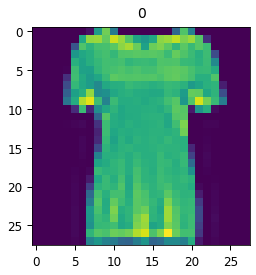

In [166]:
num = 10 # Номер изображения

np.set_printoptions(linewidth = 200) # Количество символов в строке для вставки разрывов строк 
print(training_images[num])

# Создание новой фигуры
plt.figure(
    figsize = (4, 4) # Размер фигуры в дюймах
)

ax = plt.axes() # Добавление осей к текущей фигуре

# Заголовок осей
ax.set_title(
    label = training_labels[num], # Заголовок
    fontdict = {
        'fontsize': 14, # Размер заголовка
        'color': '#000000' # Цвет заголовка
    },
    pad = 10 # Отступ заголовка от вершины осей
)

# Изменение внешнего вида меток
ax.tick_params(
    axis = 'x', # Ось
    direction = 'out', # Расположение линий меток
    length = 5, # Длина линий меток
    width = 1, # Ширина линий меток 
    color = '#000000', # Цвет линий меток
    pad = 5, # Расстояние между линиями меток и метками
    labelsize = 12, # Размер метки
    labelcolor = '#000000', # Цвет метки
    bottom = True,  # Рисование линий меток
)
ax.tick_params(
    axis = 'y', # Ось
    direction = 'out', # Расположение линий меток
    length = 5, # Длина линий меток
    width = 1, # Ширина линий меток 
    color = '#000000', # Цвет линий меток
    pad = 5, # Расстояние между линиями меток и метками
    labelsize = 12, # Размер метки
    labelcolor = '#000000', # Цвет метки
    left = True  # Рисование линий меток
)

plt.imshow(training_images[num]) # Отображение массива данных в виде изображения

plt.show() # Отображение фигуры

### Нормализация набора изображений и диапазона `[0:255]` в диапазон `[0:1]`

In [168]:
training_images = training_images / 255.0 # Обучающая выборка
test_images = test_images / 255.0 # Тестовая выборка

### Определение модели нейронной сети

**Sequential**: Последовательные слои в нейронной сети

**Dense**: Добавление слоя с нейронами

In [169]:
# Модель с последовательными слоями в нейронной сети
model = keras.Sequential([
    keras.layers.Flatten(), # Преобразование массива пикселей в вектор пикселей
    # Полносвязный скрытый слой
    keras.layers.Dense(
        units = 128, # Количество нейронов
        activation = tf.nn.relu # Функция активации
    ),
    # Полносвязный слой
    keras.layers.Dense(
        10, # Количество нейронов = количество классов
        activation = tf.nn.softmax # Функция активации
    )
])

### Построение модели нейронной сети

In [170]:
# Сборка модели
model.compile(
    optimizer = tf.optimizers.Adam(), # Оптимизатор
    loss = 'sparse_categorical_crossentropy', # Функция потерь
    metrics = ['accuracy'] # Метрика оценивания
)

### Остановка процесса обучения

In [171]:
class myCallback(keras.callbacks.Callback):
    """
    Остановка процесса обучения
    """
    
    def on_epoch_end(self, epoch, logs = {}):
        # Сравнение точности на текущей эпохе
        if(logs.get('accuracy') > 0.95):
              self.model.stop_training = True # Остановка обучения

### Обучение модели

In [172]:
callbacks = myCallback() # Остановка процесса обучения

# Обучение модели
model.fit(
    training_images, # Обучающий набор данных
    training_labels, # Метки классов
    epochs = 5, # Количество эпох
    verbose = True, # Отключение вывода
    callbacks = [callbacks] # Вызов функции после каждой эпохи
)

Epoch 1/5
60000/60000 [==============================] - 2s 30us/step - loss: 1.0910 - accuracy: 0.6602
Epoch 2/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.6365 - accuracy: 0.7715
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.5606 - accuracy: 0.8008
Epoch 4/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.5186 - accuracy: 0.8158
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.4912 - accuracy: 0.8260


### Проверка работы модели на тестовой выборке

In [173]:
model.evaluate(
    test_images, # Тестовый набор данных
    test_labels  # Метки классов
)

10000/10000 [==============================] - 0s 21us/step


[0.5072126101493836, 0.8177000284194946]

### Получение вероятностей, что определенное изображение в тестовом наборе данных является каждым из 10 классов

In [174]:
classifications = model.predict(test_images) # Предсказания для тестового набора данных

classifications = np.around(classifications, 3) # Округление предсказаний

num = 4 # Номер изображения в тестовом наборе данных

# Отображение в DataFrame
df_classifications = pd.DataFrame(data = classifications[num]).transpose() # Вероятности
df_classifications.head(None) # Отображение первых N строк или все если указать None

,0,1,2,3,4,5,6,7,8,9
0,0.112,0.001,0.141,0.026,0.015,0.0,0.698,0.0,0.008,0.0
